# Getting Started With Landsat Data  

| Authors:  | Claire Krause, Arapaut Sivaprasad|
|----------|----------------|
| Created: | May 02, 2018 |
| Last edited: | May 11, 2018 |

## Retrieve and plot the data from Landsats 5, 7 and 8

**Background:** Data from three Landsats (5,7 and 8) are available to access within DEA. This document has a short description about these satellites, scan line correction (SLC), data corrections (NBAR, NBAR-T), data bands and products within datacube. The code snippets in this doc will let you retrieve and plot the data for **ls\*_nbar_albers** and **ls\*_nbart_albers.** 

**What does this document do?**

- Show how to open a datacube to retrieve the data for various time points and geo-coordinates.

- Explain the data corrections.

- Plot a scene as true colour image.

- Plot the same as false colour image.

- Compare multiple scenes side-by-side.

**How to use this document:**

A basic understanding of *any* programming language is desirable, so that the code will make sense, but one doesn't have to be an expert Python programmer to manipulate the code to get and display the data. 

This doc applies to the following Landsats and data correction methods:
- Landsat 5
- Landsat 7
- Landsat 8
- NBAR
- NBAR-T

Given below are code snippets that you can execute to perform various actions such as retrieve, display and plot the data. If you wish to learn more about the code, as well as the satellites and how they collect the data, please go to this [document](GettingStartedWithLandSats5-7-8_Long.ipynb).

### About Landsats

Landsat represents the world's longest continuously acquired collection of space-based moderate-resolution land remote sensing data. Four decades of imagery provides a unique resource for those who work in agriculture, geology, forestry, regional planning, education, mapping, and global change research. Landsat images are also invaluable for emergency response and disaster relief.

**Landsat Missions TimeLine [[1](https://landsat.usgs.gov/landsat-missions-timeline)]**

In the mid-1960s an ambitious effort to develop and launch the first civilian Earth observation satellite was started. The goal was achieved on July 23, 1972, with the launch of the Earth Resources Technology Satellite (ERTS-1), which was later renamed Landsat 1. The launches of Landsat 2, Landsat 3, and Landsat 4 followed in 1975, 1978, and 1982, respectively.

When Landsat 5 was launched in 1984, no one could have predicted that the satellite would continue to deliver high quality, global data of Earth's land surfaces for 28 years and 10 months until its retirement in June, 2013. Landsat 6, however, failed to achieve orbit in 1993.

Landsat 7 was successfully launched in 1999 and, along with Landsat 8 launched in 2013, continues to provide daily global data. Landsat 9 is planned to be launched in late 2020.

Given below is a timeline of the various Landsats.

![Fig 1. Timeline of the working lives of Landsats since 1972](TimelineOnlyForWebRGB.jpg)

### Basic details about the Landsats 5 to 9

| Name | Launch Date | End Date | Sensors | Orbit | Repeat Cycle | Bands | Data Rate | 
| -----|-------------|----------|--------------------|----------|-------|--------------|-----------|
| Landsat_5 | Mar 1, 1984 | June 5, 2013 | MSS, TM | Sun-synchronous, near-polar orbit at 705km | 16 days | 7 | 85 Mbps |
| Landsat_6 | Oct 5, 1993 | (did not achieve orbit) ||||||
| Landsat_7 | Apr 15, 1999 | Current | ETM+ | Sun-synchronous, near-polar orbit at 705km | 16 days | 8 | 150 Mbps |
| Landsat_8 | Feb 11, 2013 | Current | OLI, TIRS | Sun-synchronous, near-polar orbit at 705km | 16 days | 11 | 260.92 and 384&nbsp;Mbps |
| Landsat_9 | Dec, 2020 | 5 years from launch | OLI-2, TIRS-2| Sun-synchronous orbit at an altitude of 438 miles | 16 days | 11 | 384 Mbps |



### Scan Line Corrector [[2](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]

The Scan Line Corrector (SLC) is an electro-optical mechanism composed of two parallel mirrors set at an angle on a shaft. The SLC is positioned behind the primary optics and compensates for the along-track motion of the spacecraft occurring during an active SMA cross-track scan. As a result, a rectilinear scan pattern is produced using the SLC instead of the zigzag pattern that would be produced without it.

![Figure 2. ETM+ scan line corrector (SLC) effect.](scan_line_corrector.jpg)

The SLC failed for Landsat 7 on May 31, 2003. Without an operating SLC, the ETM+ line of sight now traces a zig-zag pattern along the satellite ground track (see the figure above) resulting in wedge shaped scan-to-scan gaps (and alternating overlap areas) which increase in magnitude away from nadir. Despite the SLC failure, Landsat 7 ETM+ is still capable of acquiring useful image data with the SLC turned off (SLC-off), particularly within the central portion of any given scene (see the figure below). Various interpolation and compositing techniques were investigated to expand the coverage of useful data. 

![Figure 3. Scan line corrected image.](scan_line_corrected_image.jpg)

The top image shows a subset of a SLC-on scene. The middle, a scene from the same area after the SLC failed. The bottom image shows the middle image, after the SLC gaps were largely filled by interpolation.

The data we have in datacube is NOT interpolated and, hence, will show the stripes in all the "ls7" products.

### About data corrections

There are two corrections applied to the Landsat data:

**NBAR** 

NBAR stands for Nadir-corrected BRDF Adjusted Reflectance, where ***BRDF*** stands for Bidirectional Reflectance Distribution Function. The approach involves atmospheric correction to compute surface-leaving radiance, and bi-directional reflectance modelling to remove the effects of topography and angular variation in reflectance.

**NBAR-T**

Surface reflectance NBAR-T includes the terrain illumination reflectance correction and has the same features of NBAR, along with some additional features.

See more details about [Surface Reflectance](http://geoscienceaustralia.github.io/digitalearthau/data/data.html).

Note that the nbar-t data inserts a missing value (-9999) into the dataset to denote a terrain shadow. This should be converted to a NaN value before using this data to avoid treating it as a valid value.

### About the bands
The sensors on the Landsats are different and collect reflected radiance in various spectral wavelengths. These are called bands, and are used when we plot a scene. Details about the bands for each satellite can be found at [[Landsat 5](https://landsat.usgs.gov/landsat-5-history)], [[Landsat 7]( https://landsat.usgs.gov/landsat-7-history)]  and [[Landsat 8](https://landsat.usgs.gov/landsat-8-mission)]. We do not provide in the datacube data from all bands. The ones we provide are listed below. 

- **Landsat 5:**
    - We only provide the Thematic Mapper (TM) sensor
        - We don't include the Thermal band in above, or the Multispectral Scanner (MSS)

- **Landsat 7:**
    - We provide the Enhanced Thematic Mapper Plus (ETM+) bands
        - We don't include the Thermal band or panchromatic band in the above

- **Landsat 8:**
    - We provide the Operational Land Imager (OLI) bands
        - We don't include the panchromatic or cirrus bands
    - We don't include the Thermal Infrared Sensor (TIRS) bands
    
In all cases, we produce our products as 25m, while USGS produces 30m (the actual data is somewhere in between).

The list of bands are given below. The band names to be used in code, when retrieving the data, are given in brackets.

- **Landsats 5 and 7:**
    - For Landsat 5 and 7 the bands are as follows:
        - Band 1: blue (blue)
        - Band 2: green (green)
        - Band 3: red (red)
        - Band 4: near-infrared (nir)
        - Band 5: shortwave infrared 1 (swir1)
        - Band 7: shortwave infrared 2 (swir2)
- **Landsat 8:**
    - For Landsat 8 there is an extra band above the blue band, and the numbering shifts up by one for the rest.
        - Band 1: coastal aerosol (coastal_aerosol)         
        - Band 2: blue (blue)
        - Band 3: green (green), and so on.




## How to retrieve and plot the data
Let us go through the process step by step. This is a Python program or a HTML page derived from one.  

In [65]:
%matplotlib inline
import datacube
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np

### See what products are currently available
The **list_products** method in the Datacube class displays the names and details of all available products. A product may be defined as the data collected by a particular satellite and reformatted. For example, **ls7_nbar_albers**, is a set of data collected by the Landsat 7 as per the Australian Albers projected coordinate system, and the NBAR data correction applied. 

Given below are the products that are of interest to us in the context of this document and others like it. The code given below the list will let you see ALL products in the datacube.

|id 	| name 	| description|
|-|-|-|
|6 		| ls5_nbar_albers 	| Landsat 5 Surface Reflectance NBAR 25 metre, 1...|
|21 	| ls7_nbar_albers 	| Landsat 7 Surface Reflectance NBAR 25 metre, 1...|
|19 	| ls8_nbar_albers 	| Landsat 8 Surface Reflectance NBAR 25 metre, 1...|
|26 	| ls5_nbart_albers 	| Landsat 5 Surface Reflectance NBART 25 metre, ...|
|29 	| ls7_nbart_albers 	| Landsat 7 Surface Reflectance NBART 25 metre, ...|
|28 	| ls8_nbart_albers 	| Landsat 8 Surface Relfectance NBART 25 metre, ...|
|3 		| ls5_nbar_scene 	| Landsat 5 NBAR 25 metre|
|10 	| ls7_nbar_scene 	| Landsat 7 NBAR 25 metre|
|15 	| ls8_nbar_scene 	| Landsat 8 NBAR 25 metre|
|4 		| ls5_nbart_scene 	| Landsat 5 NBART 25 metre|
|11 	| ls7_nbart_scene 	| Landsat 7 NBART 25 metre|
|16 	| ls8_nbart_scene 	| Landsat 8 NBART 25 metre|
|23 	| ls5_pq_albers 	| Landsat 5 Pixel Quality 25 metre, 100km tile, ...|
|22 	| ls7_pq_albers 	| Landsat 7 Pixel Quality 25 metre, 100km tile, ...|
|20 	| ls8_pq_albers 	| Landsat 8 Pixel Quality 25 metre, 100km tile, ...|
|5 		| ls5_pq_scene 	| Landsat 5 PQ 25 metre|
|12 	| ls7_pq_scene 	| Landsat 7 PQ 25 metre|
|17 	| ls8_pq_scene 	| Landsat 8 PQ 25 metre|
|69 	| ls5_fc_albers 	| Landsat 5 Fractional Cover 25 metre, 100km til...|
|70 	| ls7_fc_albers 	| Landsat 7 Fractional Cover 25 metre, 100km til...|
|71 	| ls8_fc_albers 	| Landsat 8 Fractional Cover 25 metre, 100km til...|


#### Code to display the products

In [66]:
dc = datacube.Datacube(app='dc-metadata')
products = dc.list_products()
display_columns = ['name', 'description']
display_rows = [1]
dc_products = products[display_columns]
#dc_products # Activate this line to see all products

### Specify the *query* with the coordinates and date range

- lat/lon: Latitude and longitude of the area. e.g. Canberra = 'lat': (-35.25, -35.35), 'lon': (149.05, 149.17)
- time: Date range to fetch the scenes. The approximate time between two scenes is 16 days. If there is a location near a swath boundary, it may be captured in two passes and so there could be two images within the 16 day period.
    - You must know [the date(s) for which data is available](https://data.dea.gadevs.ga/ls7_nbar_scene) for each satellite/product, so that the query can be specified correctly. 

In [67]:
query = {
        'lat': (-35.25, -35.35),
        'lon': (149.05, 149.17),
        'time':('2017-01-01', '2017-01-15')
        }

### Now we actually load and look at some data
We will focus on data from the Landsats (5,7 and 8) for this demonstration. Sometimes multiple scenes are acquired by the satellite on the same day. We want to group these together, and will use group_by='solar_day' to do this. To load in the data, we need only to provide the geo-coordinates and time range.

### Create a data scene object
The return value from the load command below is an **xarray** object, which has two core data structures:

- **DataArray** is a labeled, N-dimensional array. 
- **Dataset** is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the **pandas.DataFrame**.


In [68]:
ds = dc.load(product='ls8_nbar_albers', group_by='solar_day', **query)
ds

<xarray.Dataset>
Dimensions:          (time: 2, x: 492, y: 500)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-07T23:50:29 ...
  * y                (y) float64 -3.953e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x                (x) float64 1.542e+06 1.542e+06 1.542e+06 1.542e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 1491 1547 1622 1593 1577 1570 1560 ...
    blue             (time, y, x) int16 1380 1394 1492 1479 1455 1438 1407 ...
    green            (time, y, x) int16 1469 1506 1515 1503 1501 1535 1564 ...
    red              (time, y, x) int16 1458 1509 1521 1507 1502 1514 1532 ...
    nir              (time, y, x) int16 2190 2242 2278 2283 2251 2241 2299 ...
    swir1            (time, y, x) int16 1294 1266 1257 1267 1285 1322 1337 ...
    swir2            (time, y, x) int16 1076 1064 1059 1055 1065 1096 1113 ...
Attributes:
    crs:      EPSG:3577

### Function to plot one image from the data

In [69]:
'''
    Last modified: April 2018
    Author: Mike Barnes
    Modified by: Claire Krause, Cate Kooymans, Robbi Bishop-Taylor, Sivaprasad Arapaut

Parameters for three_band_image():

Inputs:

    ds - dataset containing the bands to be plotted
    bands - list of three bands to be plotted

Optional:

    time - Index value of the time dimension of ds to be plotted.
        This index refers to the scenes captured, depending on your date range.
    figsize - dimensions for the output figure.
    contrast_enhance - determines the transformation for plotting onto RGB. If contrast_enhance = true, exposure.equalize_hist is used to transform the data. Else, the data are standardised relative to reflectance = 5000.
    title - string for the plot title. If nothing is given, it will print the names of the bands being plotted.
    projection - options are 'projected' or 'geographic'; determines if the image is in degrees or northings.
        The terms easting and northing are geographic Cartesian coordinates for a point. Easting refers to the eastward-measured distance (or the x-coordinate), while northing refers to the northward-measured distance (or the y-coordinate). Easting and northing coordinates are commonly measured in metres from the axes of some horizontal datum.
'''
def three_band_image(ds, bands, time=0, figsize=[10, 10], contrast_enhance=True, title='My Plot', projection='projected'):

    # Get the number of scenes and the number of x and y coordinates
    t, y, x = ds[bands[0]].shape

    # Initialise a numpy.ndarray class object with 0's
    rawimg = np.zeros((y, x, 3), dtype=np.float32)

    # Populate the rawimg array with actual values. These are taken from all specified bands
    for i, colour in enumerate(bands):
        rawimg[:, :, i] = ds[colour][time].values

    # If any value is recorded as -999, then change it to a NaN to make it an invalid data point
    rawimg[rawimg == -999] = np.nan
    
    # Enhance the picture quality by applying 'histogram_equalisation'
    if contrast_enhance:
        img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))
    else:
        img_toshow = rawimg / 5000
        
    # Plot the data
    fig = plt.figure(figsize=figsize)
    plt.imshow(img_toshow)
    
    # Build the X and Y axes
    ax = plt.gca()

    ax.set_title(str(ds.time[time].values), fontweight='bold', fontsize=16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    
    ax.set_xlabel('Eastings', fontweight='bold')
    ax.set_ylabel('Northings', fontweight='bold')


### Plot an image
The code blocks given below will plot a scene, specified as 'time = 1'. Must remember that the index starts at 0 and if there is only one scene in the data, like what happens when the date range is less than ~16 days, you cannot display the second scene. In that case, 'time = 0' must be given.

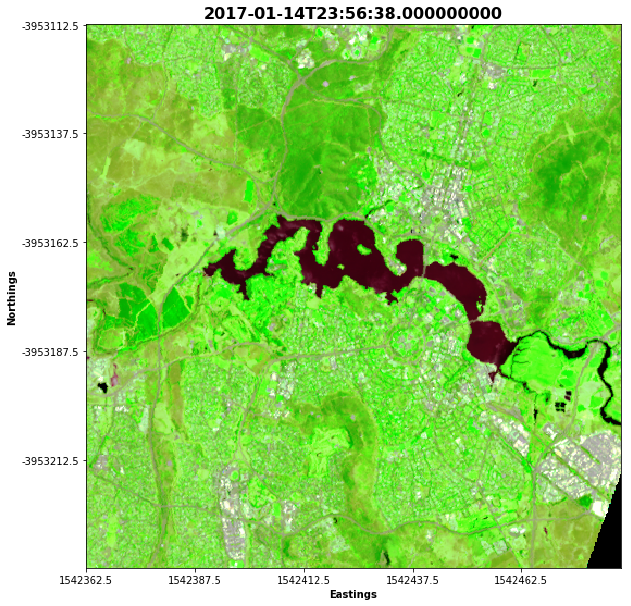

In [70]:
three_band_image(ds, bands = ['red', 'nir', 'blue'], time = 1)

### Plot this scene up as true colour image
True colour images approximate what the human eye sees when looking at a landscape. Note that the function used for this true colour plot enhances the contrast between the bands, specified as 'contrast_enhance=True', resulting in a colour-enhanced image.

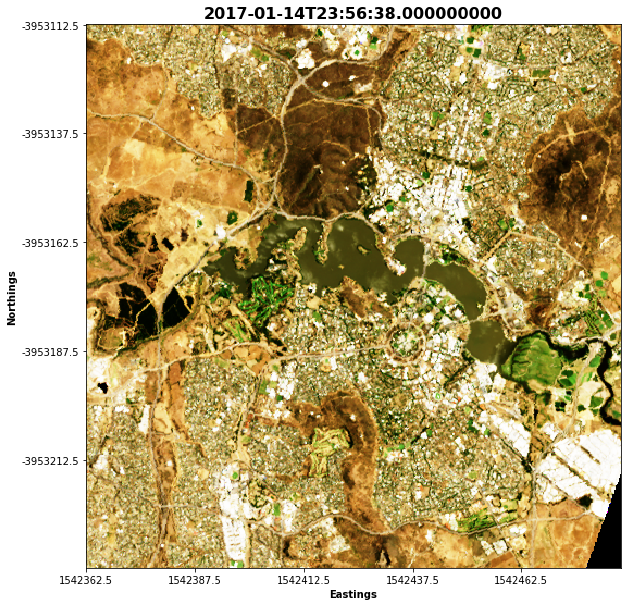

In [71]:
three_band_image(ds, bands = ['red', 'green', 'blue'], time = 1)

### Plot this scene up as false colour image
This plot uses the SWIR and NIR bands to accentuate the presence of water in the landscape.

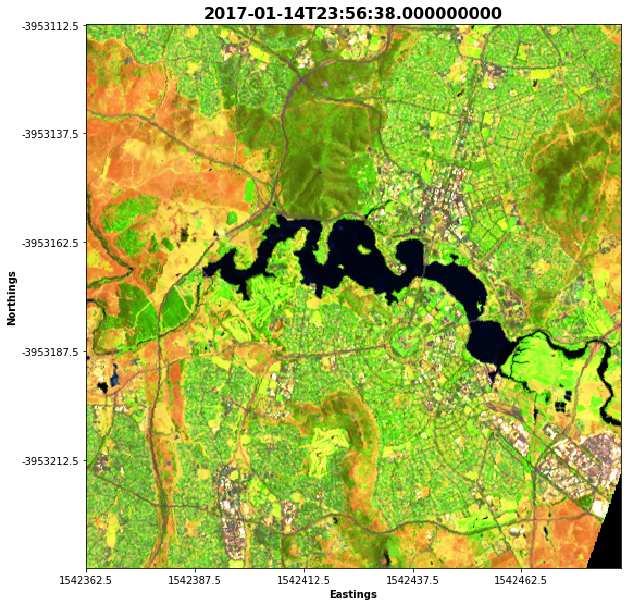

In [72]:
three_band_image(ds, bands = ['swir1','nir', 'green'], time = 1)

### Function to plot multiple images side by side
If there are more than one scene in the data, they can be plotted in a grid as shown below.

In [73]:
'''
    Last modified: March 2018
    Author: Mike Barnes
    Modified by: Claire Krause, Robbi Bishop-Taylor, Sivaprasad Arapaut

Parameters for three_band_image_subplots():

Inputs:

    ds - dataset containing the bands to be plotted
    bands - list of three bands to be plotted
    num_cols - number of columns for the subplot

Optional:

    contrast_enhance - determines the transformation for plotting onto RGB. If contrast_enhance = true, exposure.equalize_hist is used to transform the data. Else, the data are standardised relative to reflectance = 5000
    figsize - dimensions for the output figure
    projection - options are 'projected' or 'geographic'; determines if image is in degrees or northings
    left - the space on the left side of the subplots of the figure
    right - the space on the right side of the subplots of the figure
    bottom - the space on the bottom of the subplots of the figure
    top - the space on the top of the subplots of the figure
    wspace - the amount of width reserved for blank space between subplots
    hspace - the amount of height reserved for white space between subplots
'''
def three_band_image_subplots(ds, bands, num_cols, contrast_enhance=False, figsize=[10, 10],
projection='projected', left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4):  

    # Find the number of rows/columns we need, based on the number of time steps in ds
    timesteps = ds.time.size
    num_rows = int(np.ceil(timesteps / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
    numbers = 0
    for ax in axes.flat:
        
        # Get the number of scenes (same as timesteps) and the number of x and y coordinates
        t, y, x = ds[bands[0]].shape

        # Initialise a numpy.ndarray class object with 0's
        rawimg = np.zeros((y, x, 3), dtype=np.float32)

        # Populate the rawimg array with actual values. These are taken from all specified bands
        for i, colour in enumerate(bands):
            
            # If there is an empty plot(s) on the last row, as happens if "num_cols * num_rows != timesteps",
            # the statement below will give an error. Hence, the try/except switch is important
            try:
                rawimg[:, :, i] = ds[colour][numbers].values
            except:
                pass

        # If any value is recorded as -999, then change it to a NaN to make it an invalid data point
        rawimg[rawimg == -999] = np.nan

        # Enhance the picture quality by applying 'histogram_equalisation'
        if contrast_enhance:
            img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))

        else:
            # Here, we are just reducing the numbers to between 0 and 2, as the maximum value is 10,000.
            # It is a figure arrived at by trial and error to display a better image. 
            # It works well for False Colour, but not so much for RGB
            img_toshow = rawimg / 5000

        # If there is an empty plot(s) on the last row, as happens if "num_cols * num_rows != timesteps",
        # the statement below will give an error. Hence, the try/except switch is important
        try:
            
            # Plot the data
            ax.imshow(img_toshow)
            ax.set_title(str(ds.time[numbers].values), fontweight='bold', fontsize=12)
        except:
            pass

        ax.set_xticklabels(ds.x.values, fontsize=8, rotation=20)
        ax.set_yticklabels(ds.y.values, fontsize=8)

        if projection == 'geographic':
            ax.set_xlabel('Longitude', fontweight='bold', fontsize=10)
            ax.set_ylabel('Latitude', fontweight='bold', fontsize=10)

        else:
            ax.set_xlabel('Eastings', fontweight='bold', fontsize=10)
            ax.set_ylabel('Northings', fontweight='bold', fontsize=10)

        numbers = numbers + 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


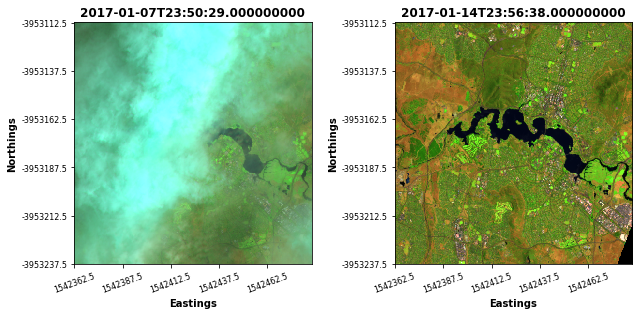

In [74]:
three_band_image_subplots(ds, bands = ['swir1','nir','green'], num_cols = 2, figsize = [10, 10], wspace = 0.35)